In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
line_modeled_df = pd.read_csv('data/extracted_line.csv')

In [3]:
line_modeled_df.head()

,Point ID,Points_0,Points_1,Points_2,Points_Magnitude,U_0,U_1,U_2,U_Magnitude,arc_length,epsilon,k,nut,p,vtkValidPointMask
0,0,-2.04303,0.500003,0.247151,2.11779,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0
1,1,-2.03300,0.500003,0.247140,2.10812,NaN,NaN,NaN,NaN,0.010022,NaN,NaN,NaN,NaN,0
2,2,-2.02298,0.500003,0.247128,2.09846,NaN,NaN,NaN,NaN,0.020043,NaN,NaN,NaN,NaN,0
3,3,-2.01296,0.500003,0.247117,2.08880,NaN,NaN,NaN,NaN,0.030065,NaN,NaN,NaN,NaN,0
4,4,-2.00294,0.500003,0.247106,2.07914,NaN,NaN,NaN,NaN,0.040086,NaN,NaN,NaN,NaN,0


In [4]:
to_plot_modeled = line_modeled_df[["Points_0", "U_Magnitude"]]

In [5]:
to_plot_modeled = to_plot_modeled.rename(columns={"Points_0": "x", "U_Magnitude": "y"})

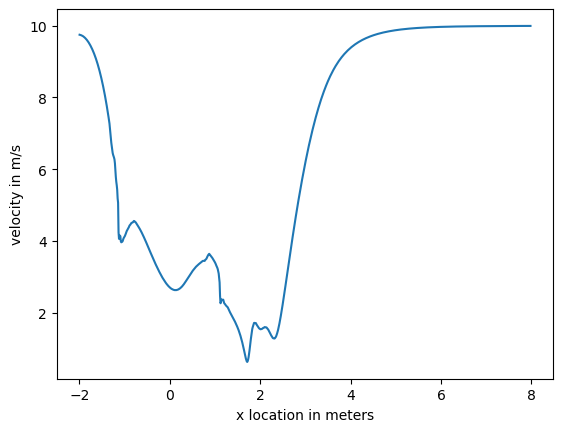

In [6]:
plt.plot(to_plot_modeled["x"], to_plot_modeled["y"])
plt.xlabel("x location in meters")
plt.ylabel("velocity in m/s")
plt.show()

In [7]:
measured_df = pd.read_csv('data/putty_serial_06_22_174320.txt', sep=";")

In [8]:
measured_df.head()

,S1,S2,S3,Millis
0,2.28,0.67,0.04,204
1,2.80,0.76,0.08,408
2,2.92,0.86,0.15,612
3,2.80,0.91,0.28,816
4,2.63,1.15,0.42,1020


In [9]:
measured_df = measured_df.dropna()

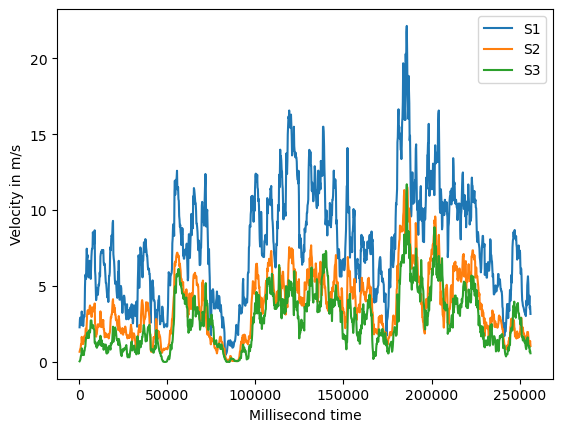

In [10]:
plt.plot(measured_df["Millis"], measured_df["S1"])
plt.plot(measured_df["Millis"], measured_df["S2"])
plt.plot(measured_df["Millis"], measured_df["S3"])
plt.xlabel("Millisecond time")
plt.ylabel("Velocity in m/s")
plt.legend(["S1", "S2", "S3"])
plt.show()

In [11]:
np.corrcoef(measured_df["S1"], measured_df["S3"])

array([[1.        , 0.83886879],
       [0.83886879, 1.        ]])

In [19]:
dif = np.abs(np.array(measured_df["S1"] - measured_df["S3"]))


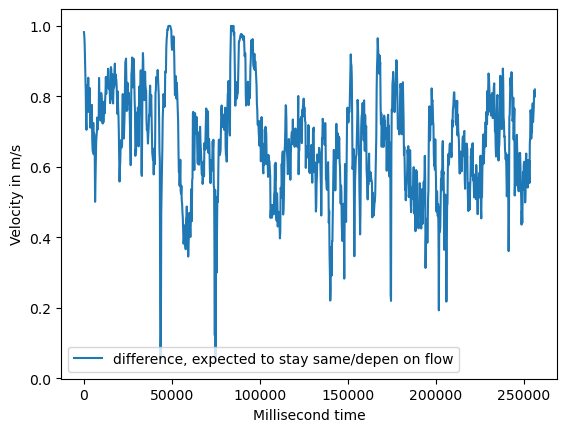

In [20]:
plt.plot(measured_df["Millis"], dif/measured_df["S1"], label = "difference, expected to stay same/depen on flow")
# plt.plot(measured_df["Millis"], measured_df["S1"], label = "S1")
plt.xlabel("Millisecond time")
plt.ylabel("Velocity in m/s")
plt.legend()
plt.show()


In [27]:
measured_df[((measured_df["S1"] - 10) < 0.1) & ((10-measured_df["S1"]) < 0.1)]

,S1,S2,S3,Millis
324,9.94,5.63,3.23,66329
342,9.94,5.03,3.30,70003
347,9.94,4.12,3.23,71024
355,10.02,2.05,3.87,72656
477,9.98,3.07,1.02,97557
479,10.02,4.13,1.42,97966
487,9.95,4.64,3.16,99599
554,9.94,4.55,5.32,113274
687,9.97,3.97,6.26,140420
747,10.07,6.44,4.09,152667
